#Bike Details Dataset

Range of selling price is between 5000 - 760000


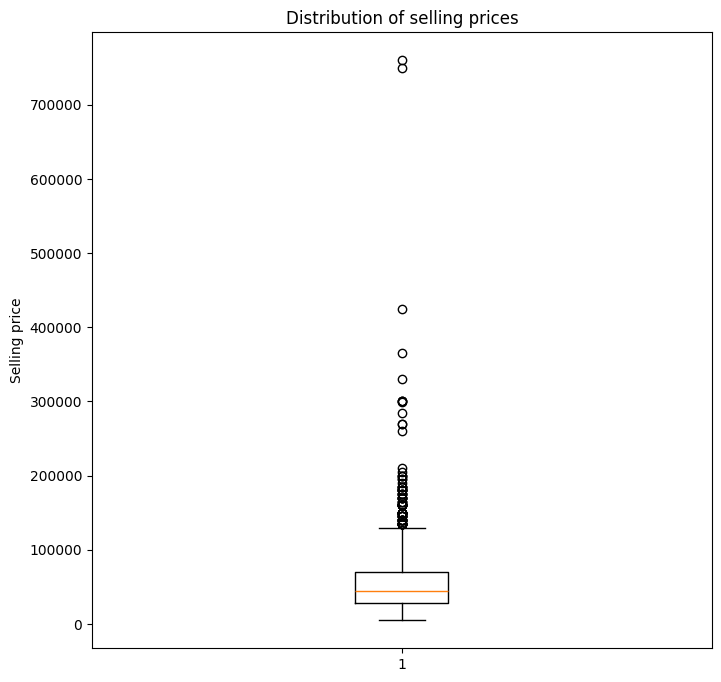

In [ ]:
###1. What is the range of selling prices in the dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/sample_data/BIKE DETAILS.csv')
max = df['selling_price'].max()
min = df['selling_price'].min()
print(f"Range of selling price is between {min} - {max}")

plt.figure(figsize=(8,8))
plt.boxplot(df['selling_price'])
plt.title("Distribution of selling prices")
plt.ylabel("Selling price")
plt.show()


In [ ]:
###2.What is the median selling price for bikes in the dataset

median = df['selling_price'].median()
print(f"Mean of selling price is {median}")

Mean of selling price is 45000.0


Most common seller type is Individual - 1055


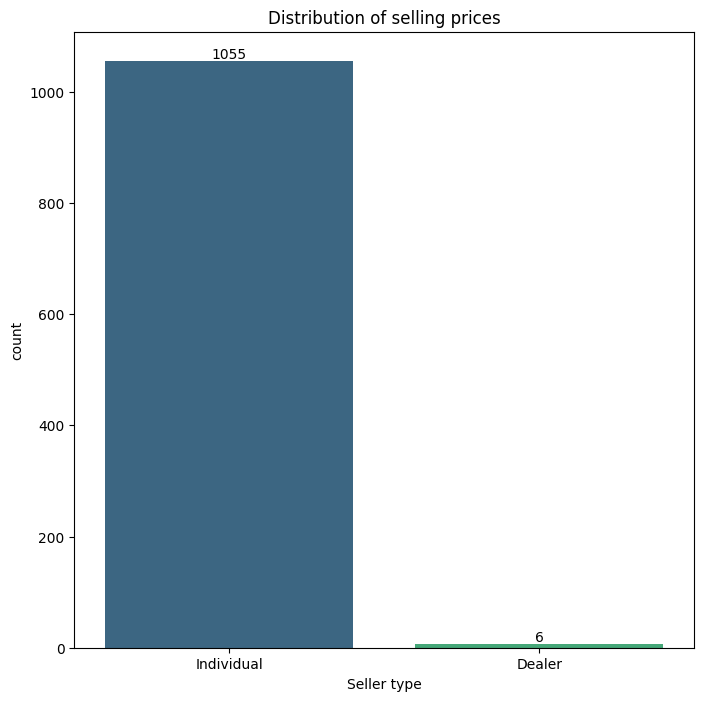

In [ ]:
###3.What is the most common seller type?
import warnings
warnings.filterwarnings('ignore')

value_count = df['seller_type'].value_counts()
value_count.colums= ['seller_type','count']
print(f"Most common seller type is {value_count.idxmax()} - {value_count.loc[value_count.idxmax()]}")

plt.figure(figsize=(8,8))
bar =sns.barplot(x='seller_type',y='count',data =pd.DataFrame(value_count),palette='viridis')
for label in bar.containers:
    bar.bar_label(label)
plt.title("Distribution of selling prices")
plt.ylabel("count")
plt.xlabel("Seller type")
plt.show()


170 bikes have driven more than 50,000 km
km_driven_bin
less than 50K km    891
More than 50K km    170
Name: count, dtype: int64


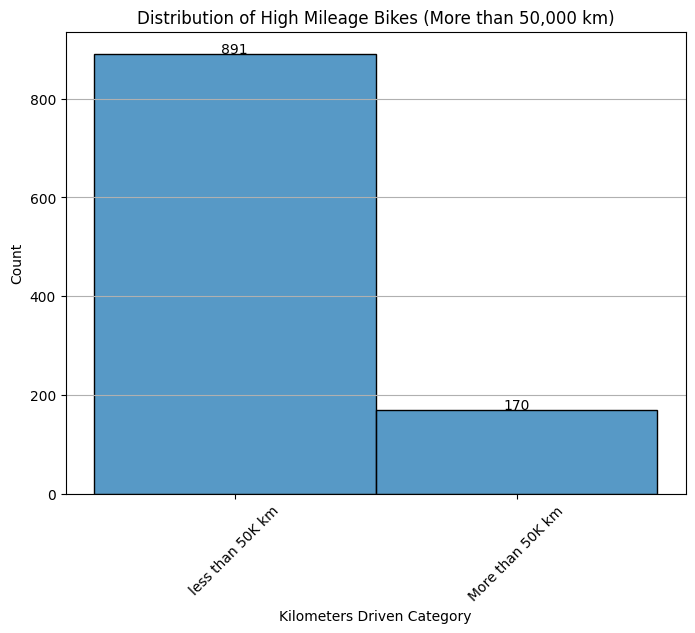

In [ ]:
###4. How many bikes have driven more than 50,000 kilometers?
count = df[df['km_driven']>50000]
print(f"{count.shape[0]} bikes have driven more than 50,000 km")


df['km_driven_bin'] = df['km_driven'].apply(lambda x: 'less than 50K km' if x<=50000 else 'More than 50K km')
print(df['km_driven_bin'].value_counts())


plt.figure(figsize=(8, 6))
hist =sns.histplot(data=df['km_driven_bin'])

for patch in hist.patches:
    height = patch.get_height()
    hist.text(patch.get_x() + patch.get_width() / 2, height + 0.5, int(height), ha='center')

plt.title('Distribution of High Mileage Bikes (More than 50,000 km)')
plt.xlabel('Kilometers Driven Category')
plt.ylabel('Count')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64
<class 'matplotlib.container.BarContainer'>


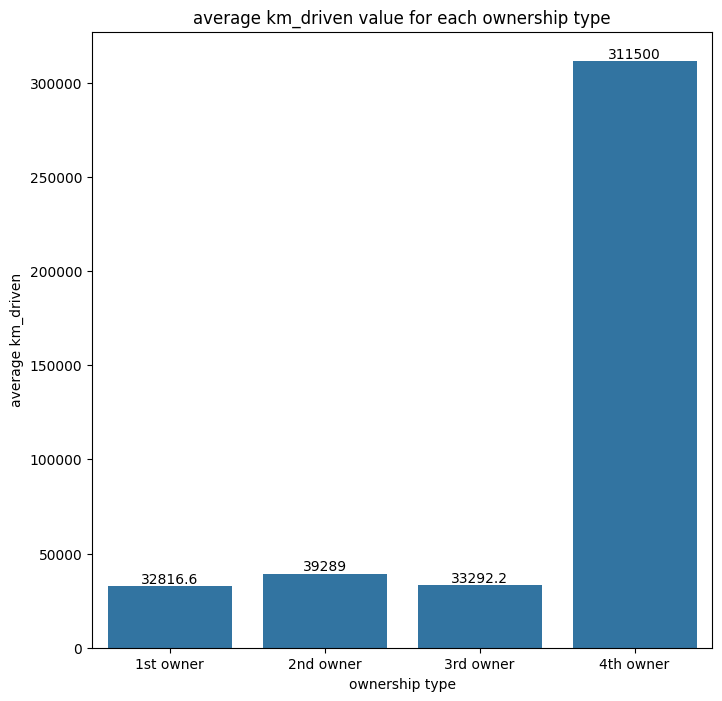

In [ ]:
###5. What is the average km_driven value for each ownership type?

data = df.groupby('owner')['km_driven'].mean()
print(data)
plt.figure(figsize=(8,8))
bar  =sns.barplot(data=data)

for label in bar.containers:
  print(type(label))
  bar.bar_label(label)

plt.xlabel("ownership type")
plt.ylabel("average km_driven")
plt.title('average km_driven value for each ownership type')
plt.show()

Count of bikes are from the year 2015 or older -560


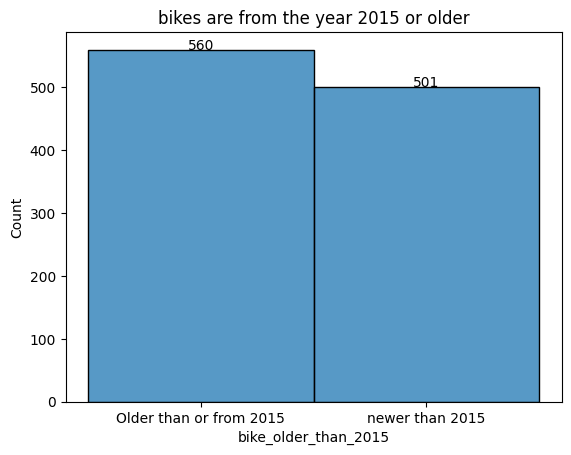

In [ ]:
###6. What proportion of bikes are from the year 2015 or older?

df['bike_older_than_2015'] = df['year']
df['bike_older_than_2015']= df['bike_older_than_2015'].apply(lambda x: 'Older than or from 2015' if x>=2015 else 'newer than 2015')
print(f"Count of bikes are from the year 2015 or older -{df[df['year']>=2015].shape[0]}")

hist = sns.histplot(data=df['bike_older_than_2015'])
for patch in hist.patches:
    height = patch.get_height()
    hist.text(patch.get_x() + patch.get_width() / 2, height + 0.5, int(height), ha='center')

plt.title('bikes are from the year 2015 or older')
plt.show()


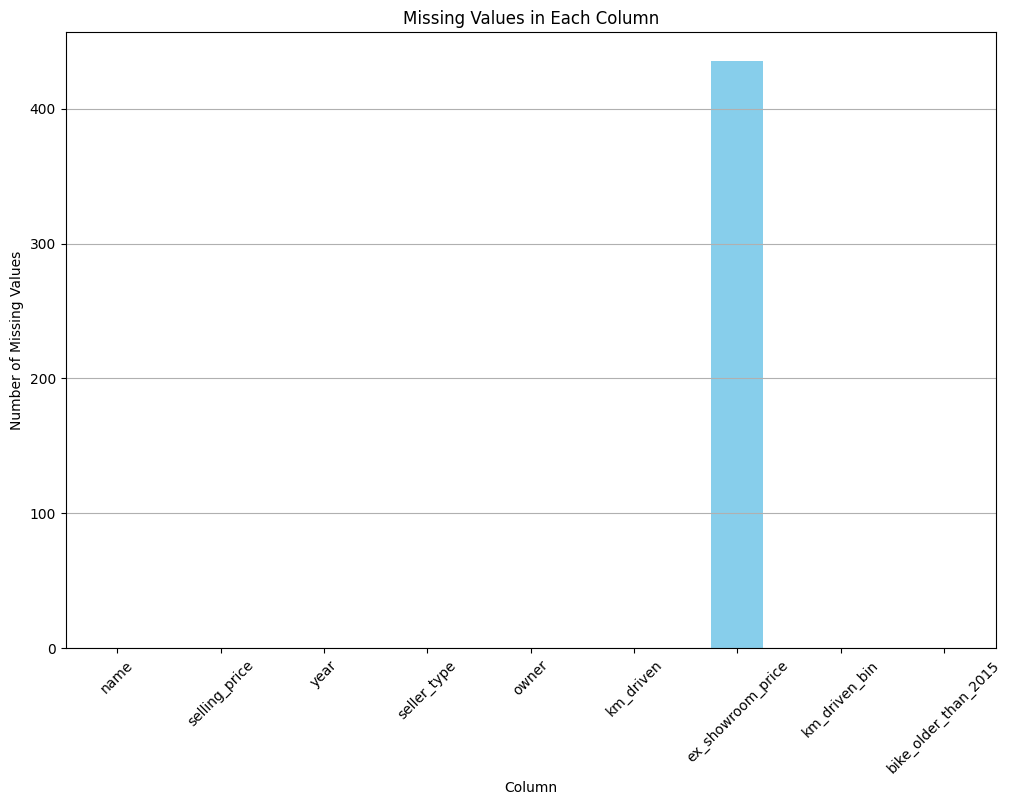

In [ ]:
###7. What is the trend of missing values across the dataset?

null_values =df.isnull().sum()

plt.figure(figsize=(12, 8))
null_values.plot(kind='bar', color='skyblue')
plt.title('Missing Values in Each Column')
plt.xlabel('Column')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [ ]:
###8. What is the highest ex_showroom_price recorded, and for which bike?

print(f"Highest ex showroom is price is - {df['ex_showroom_price'].max()} for bike- {df[df['ex_showroom_price']==df['ex_showroom_price'].max()]['name']}")

Highest ex showroom is price is - 1278000.0 for bike- 134    Harley-Davidson Street Bob
Name: name, dtype: object


seller_type
Dealer           6
Individual    1055
dtype: int64


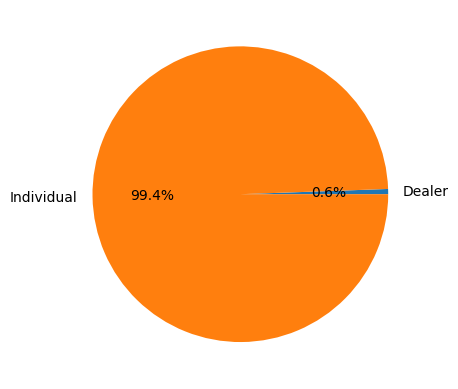

In [ ]:
###9. What is the total number of bikes listed by each seller type?

data = df.groupby('seller_type').size()
print(data)
plt.pie(data,autopct='%1.1f%%',labels=data.index)
plt.show()

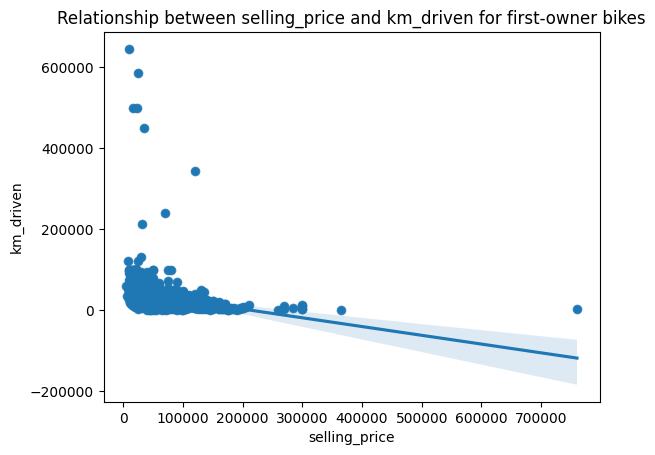

In [ ]:
###10. What is the relationship between selling_price and km_driven for first-owner bikes?

selling_price = df[df['owner']=='1st owner']['selling_price']
km_driven = df[df['owner']=='1st owner']['km_driven']

sns.scatterplot(
    x=df[df['owner']=='1st owner']['selling_price'],
    y=df[df['owner']=='1st owner']['km_driven'],
    data=df)
sns.regplot(
    x=df[df['owner']=='1st owner']['selling_price'],
    y=df[df['owner']=='1st owner']['km_driven'],
    data=df)
plt.xlabel('selling_price')
plt.ylabel('km_driven')
plt.title('Relationship between selling_price and km_driven for first-owner bikes')
plt.show()

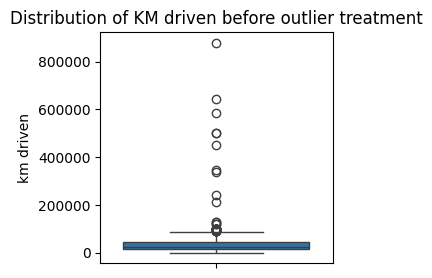

13500.0  43000.0
-30750.0  87250.0 
Num of outliers 39


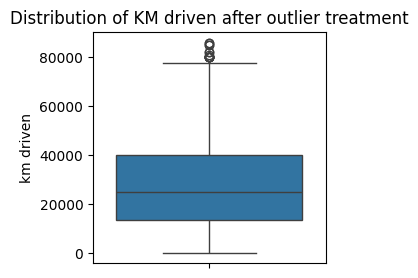

Num of outliers 0


In [ ]:
###11. Identify and remove outliers in the km_driven column using the IQR method
df = pd.read_csv('/content/sample_data/BIKE DETAILS.csv')
plt.figure(figsize=(3,3))
sns.boxplot(df['km_driven'])
plt.title('Distribution of KM driven before outlier treatment')
plt.ylabel('km driven')
plt.show()


q1 = df['km_driven'].quantile(0.25)
q3 = df['km_driven'].quantile(0.75)
print(f"{q1}  {q3}")

iqr = q3-q1
lower_bound = q1-1.5*iqr
upper_bound = q3+1.5*iqr
print(f"{lower_bound}  {upper_bound} ")
print(f"Num of outliers {df[(df['km_driven']<lower_bound) | (df['km_driven']>upper_bound)].shape[0]}")

medain = df['km_driven'].median()

df[(df['km_driven']<lower_bound) | (df['km_driven']>upper_bound)]= medain

plt.figure(figsize=(3,3))
sns.boxplot(df['km_driven'])
plt.title('Distribution of KM driven after outlier treatment')
plt.ylabel('km driven')
plt.show()
print(f"Num of outliers {df[(df['km_driven']<lower_bound) | (df['km_driven']>upper_bound)].shape[0]}")


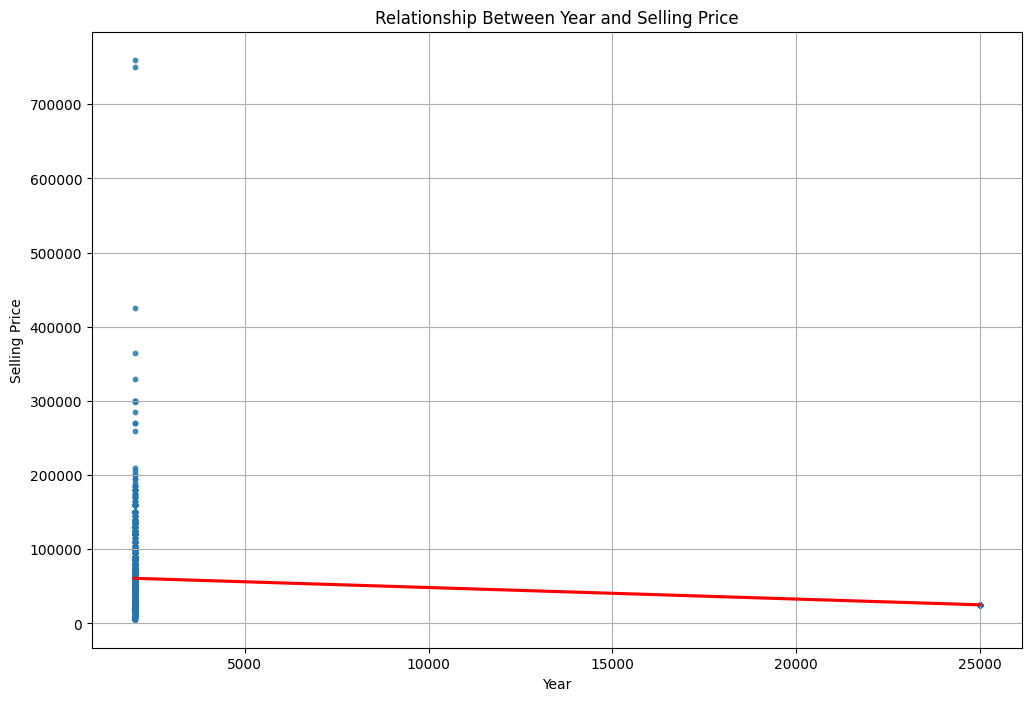

In [ ]:
###12. Perform a bivariate analysis to visualize the relationship between year and selling_price

plt.figure(figsize=(12, 8))
sns.regplot(x='year', y='selling_price', data=df, scatter_kws={'s':10}, line_kws={'color':'red'}, ci=None)
plt.title('Relationship Between Year and Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()

In [ ]:
###13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing
#year)

current_year = 2025
df['age'] = current_year - df['year']
df['depreciation'] = (df['ex_showroom_price'] - df['selling_price']) / df['age']
average_depreciation = df['depreciation'].mean()

print(f"The average depreciation in selling price based on the bike's age is: {average_depreciation:.2f} per year")

The average depreciation in selling price based on the bike's age is: 2506.91 per year


Bike names priced significantly above the average price for their manufacturing year:
                                    name  selling_price  year
2    Royal Enfield Classic Gunmetal Grey         150000  2018
7   Royal Enfield Bullet 350 [2007-2011]         180000  2008
13                         Yamaha YZF R3         365000  2019
18   Royal Enfield Classic Gunmetal Grey         150000  2018
23                         Jawa Standard         180000  2019


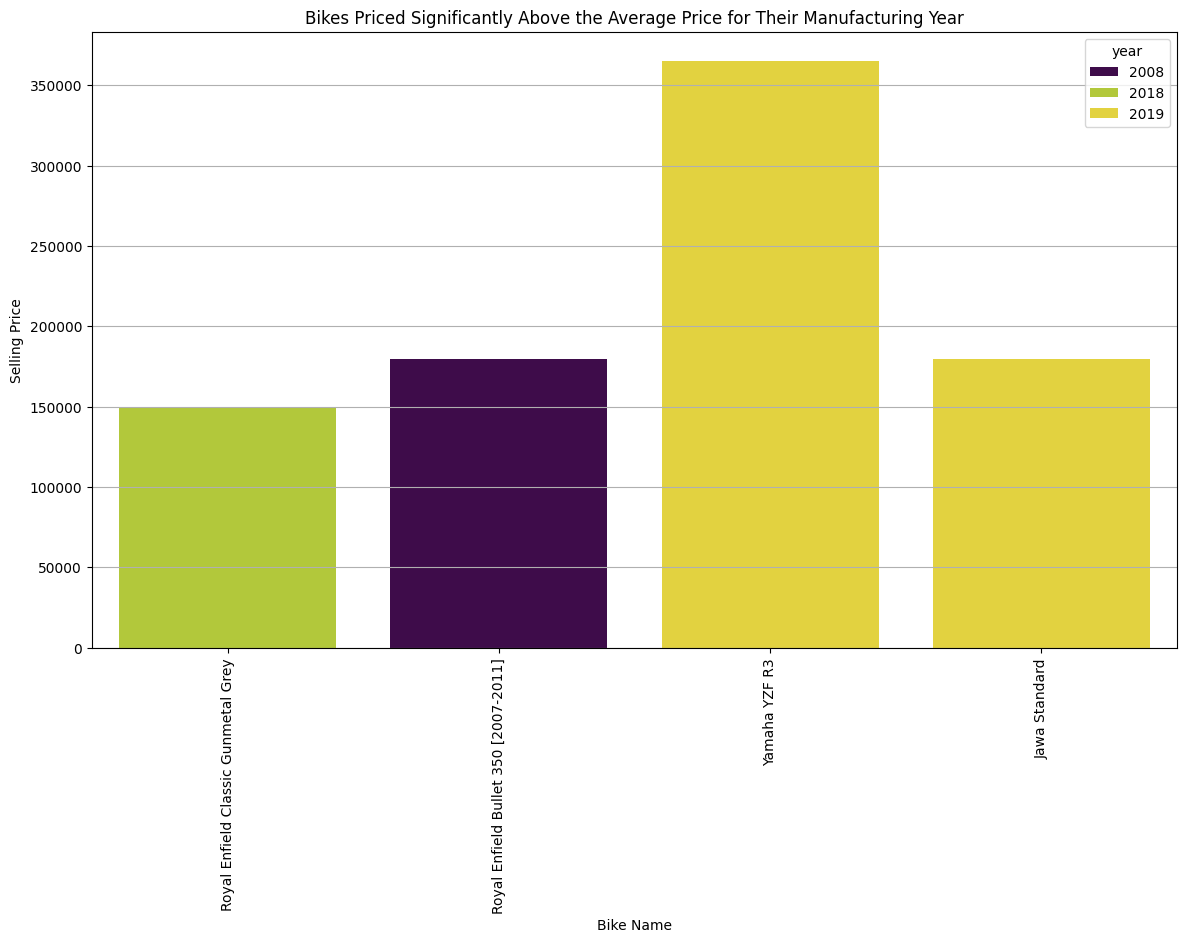

In [ ]:
###14.  Which bike names are priced significantly above the average price for their manufacturing year

average_price_per_year = df.groupby('year')['selling_price'].mean()
df['average_price'] = df['year'].apply(lambda y: average_price_per_year.loc[y])
df_above_average = df[df['selling_price'] > 1.5 * df['average_price']]

bikes_above_average = df_above_average[['name', 'selling_price', 'year']]

print("Bike names priced significantly above the average price for their manufacturing year:")
print(bikes_above_average[:5])

plt.figure(figsize=(14, 8))
sns.barplot(x='name', y='selling_price', hue='year', data=bikes_above_average, dodge=False, palette='viridis')
plt.title('Bikes Priced Significantly Above the Average Price for Their Manufacturing Year')
plt.xlabel('Bike Name')
plt.ylabel('Selling Price')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

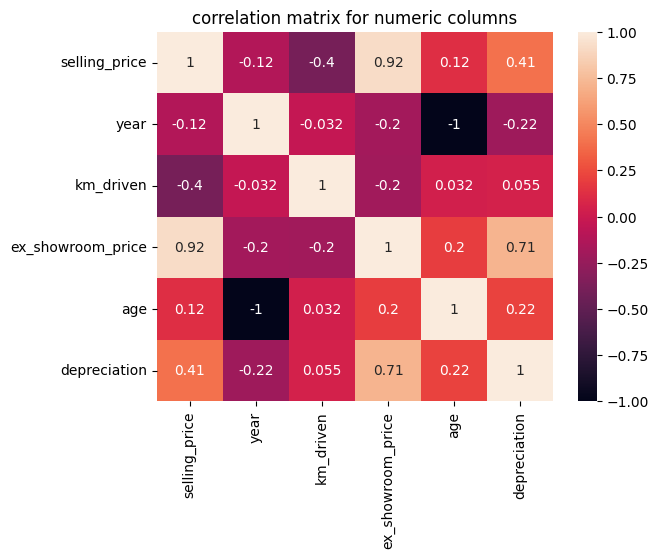

In [ ]:
###15.  Develop a correlation matrix for numeric columns and visualize it using a heatmap

corr = df.corr(numeric_only=True)
sns.heatmap(corr,annot=True,)
plt.title('correlation matrix for numeric columns')
plt.show()

#Car Sale Dataset

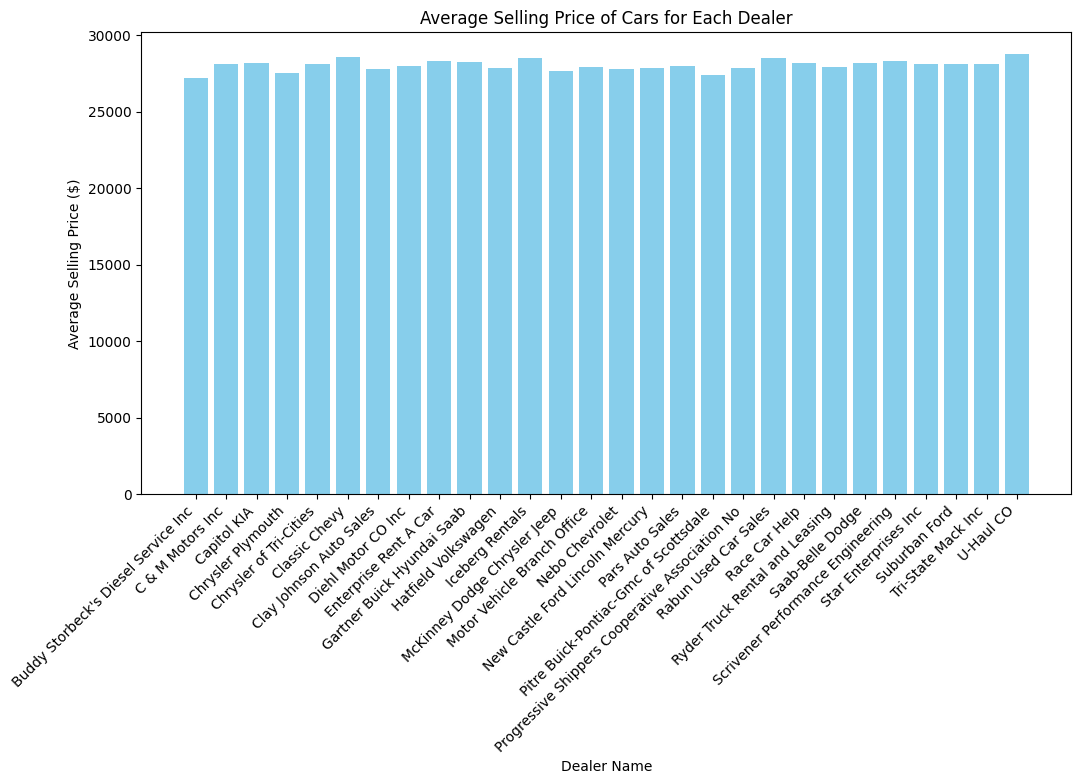

In [1]:
###1. What is the average selling price of cars for each dealer, and how does it compare across different dealers

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/sample_data/Car Sale.csv')

average_price_per_dealer = data.groupby('Dealer_Name')['Price ($)'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(average_price_per_dealer['Dealer_Name'], average_price_per_dealer['Price ($)'], color='skyblue')
plt.xlabel('Dealer Name')
plt.ylabel('Average Selling Price ($)')
plt.title('Average Selling Price of Cars for Each Dealer')
plt.xticks(rotation=45, ha='right')
plt.show()

In [2]:
###2.  Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing
#trends

price_variation = data.groupby('Company')['Price ($)'].std().reset_index()
highest_variation_brand = price_variation.loc[price_variation['Price ($)'].idxmax()]
print("Car brand with the highest price variation:")
print(highest_variation_brand)

Car brand with the highest price variation:
Company           Lincoln
Price ($)    19658.050211
Name: 15, dtype: object


<Figure size 1200x600 with 0 Axes>

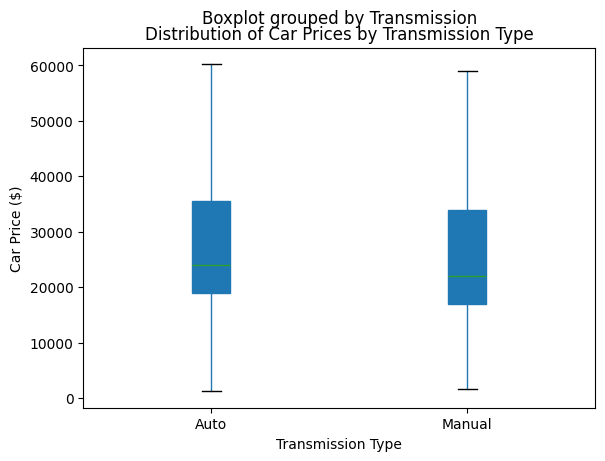

In [3]:
###3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges
#compare

plt.figure(figsize=(12, 6))
data.boxplot(column='Price ($)', by='Transmission', grid=False, patch_artist=True, showfliers=False)

plt.title('Distribution of Car Prices by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Car Price ($)')
plt.show()

<Figure size 1200x600 with 0 Axes>

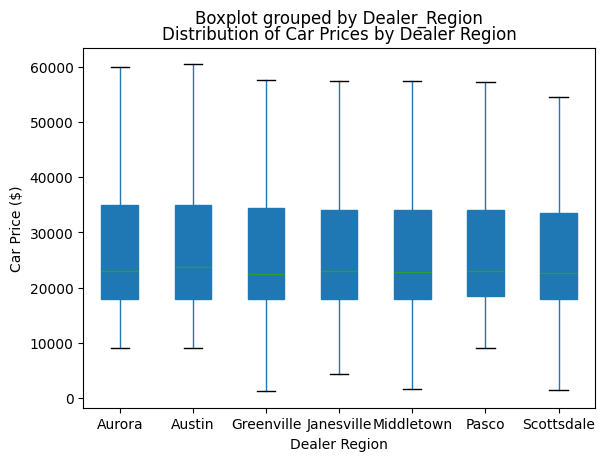

In [4]:
###4. What is the distribution of car prices across different regions

import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
data.boxplot(column='Price ($)', by='Dealer_Region', grid=False, patch_artist=True, showfliers=False)

plt.title('Distribution of Car Prices by Dealer Region')
plt.xlabel('Dealer Region')
plt.ylabel('Car Price ($)')

plt.show()


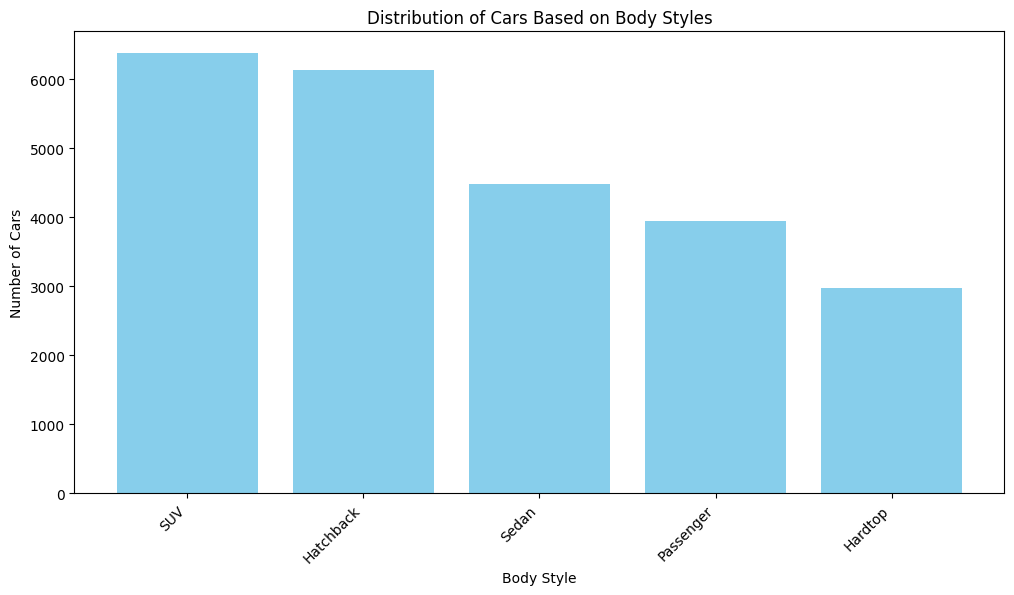

In [5]:
###5. What is the distribution of cars based on body styles

body_style_counts = data['Body Style'].value_counts().reset_index()
body_style_counts.columns = ['Body Style', 'Count']

plt.figure(figsize=(12, 6))
plt.bar(body_style_counts['Body Style'], body_style_counts['Count'], color='skyblue')
plt.xlabel('Body Style')
plt.ylabel('Number of Cars')
plt.title('Distribution of Cars Based on Body Styles')
plt.xticks(rotation=45, ha='right')
plt.show()


<ipython-input-6-d5c638808660>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_price_gender_income = data.groupby(['Gender', 'Income Bracket'])['Price ($)'].mean().reset_index()


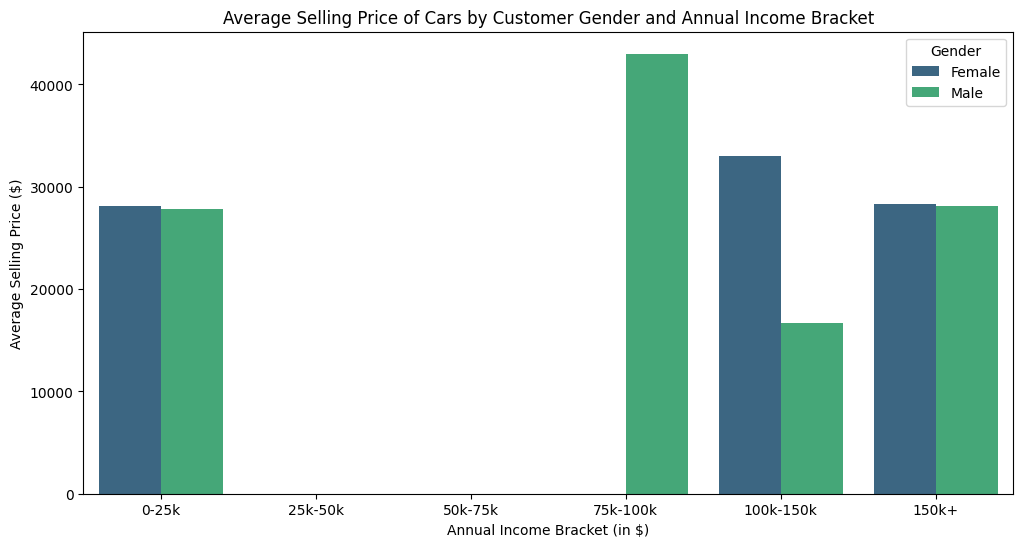

In [6]:
###6. How does the average selling price of cars vary by customer gender and annual income

bins = [0, 25000, 50000, 75000, 100000, 150000, np.inf]
labels = ['0-25k', '25k-50k', '50k-75k', '75k-100k', '100k-150k', '150k+']
data['Income Bracket'] = pd.cut(data['Annual Income'], bins=bins, labels=labels)

average_price_gender_income = data.groupby(['Gender', 'Income Bracket'])['Price ($)'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Income Bracket', y='Price ($)', hue='Gender', data=average_price_gender_income, palette='viridis')
plt.xlabel('Annual Income Bracket (in $)')
plt.ylabel('Average Selling Price ($)')
plt.title('Average Selling Price of Cars by Customer Gender and Annual Income Bracket')
plt.legend(title='Gender')
plt.show()


<Figure size 1200x600 with 0 Axes>

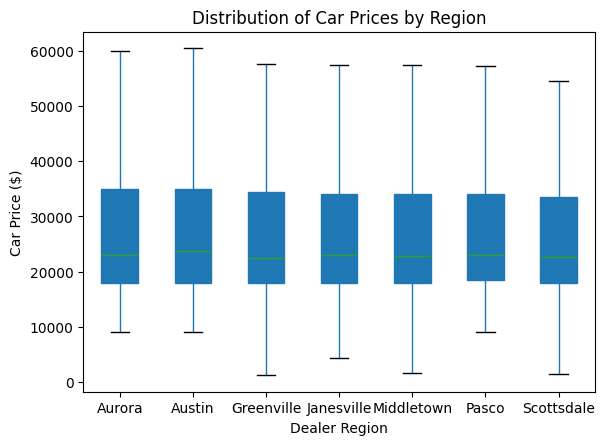

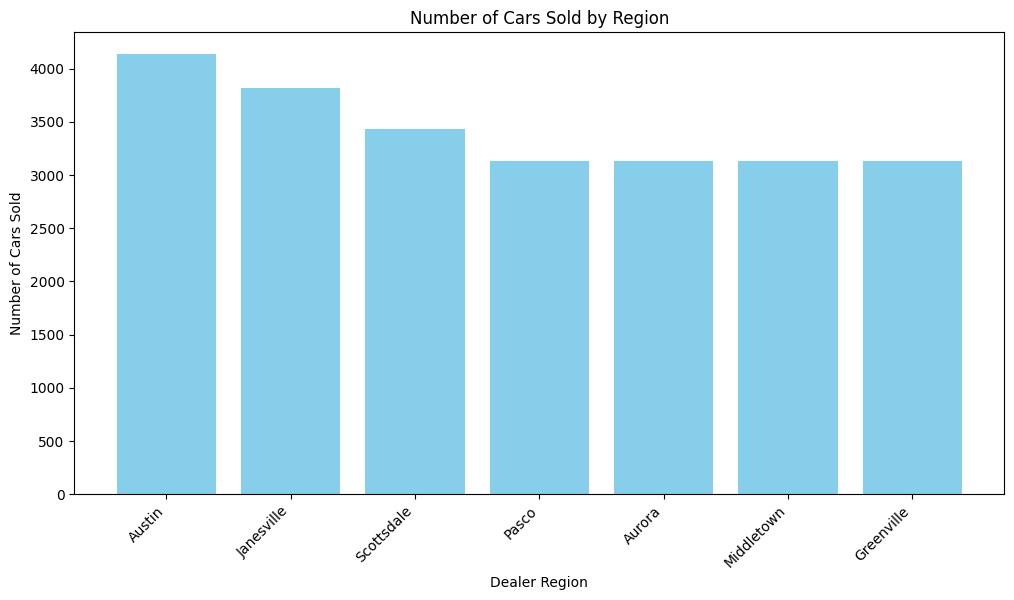

In [7]:
###7.  What is the distribution of car prices by region, and how does the number of cars sold vary by region

plt.figure(figsize=(12, 6))
data.boxplot(column='Price ($)', by='Dealer_Region', grid=False, patch_artist=True, showfliers=False)
plt.title('Distribution of Car Prices by Region')
plt.suptitle('')
plt.xlabel('Dealer Region')
plt.ylabel('Car Price ($)')
plt.show()

cars_sold_by_region = data['Dealer_Region'].value_counts().reset_index()
cars_sold_by_region.columns = ['Dealer Region', 'Number of Cars Sold']

plt.figure(figsize=(12, 6))
plt.bar(cars_sold_by_region['Dealer Region'], cars_sold_by_region['Number of Cars Sold'], color='skyblue')
plt.xlabel('Dealer Region')
plt.ylabel('Number of Cars Sold')
plt.title('Number of Cars Sold by Region')
plt.xticks(rotation=45, ha='right')
plt.show()


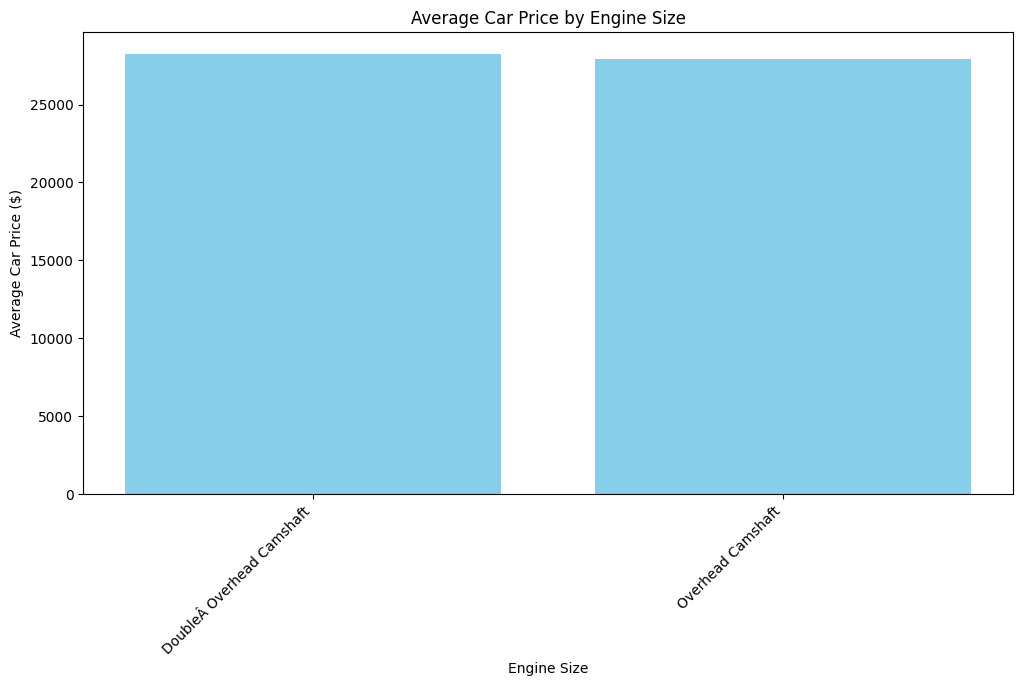

In [8]:
###8.  How does the average car price differ between cars with different engine sizes

average_price_by_engine = data.groupby('Engine')['Price ($)'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(average_price_by_engine['Engine'], average_price_by_engine['Price ($)'], color='skyblue')
plt.xlabel('Engine Size')
plt.ylabel('Average Car Price ($)')
plt.title('Average Car Price by Engine Size')
plt.xticks(rotation=45, ha='right')
plt.show()


<ipython-input-9-b5a28433c150>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_price_by_income = data.groupby('Income Bracket')['Price ($)'].mean().reset_index()


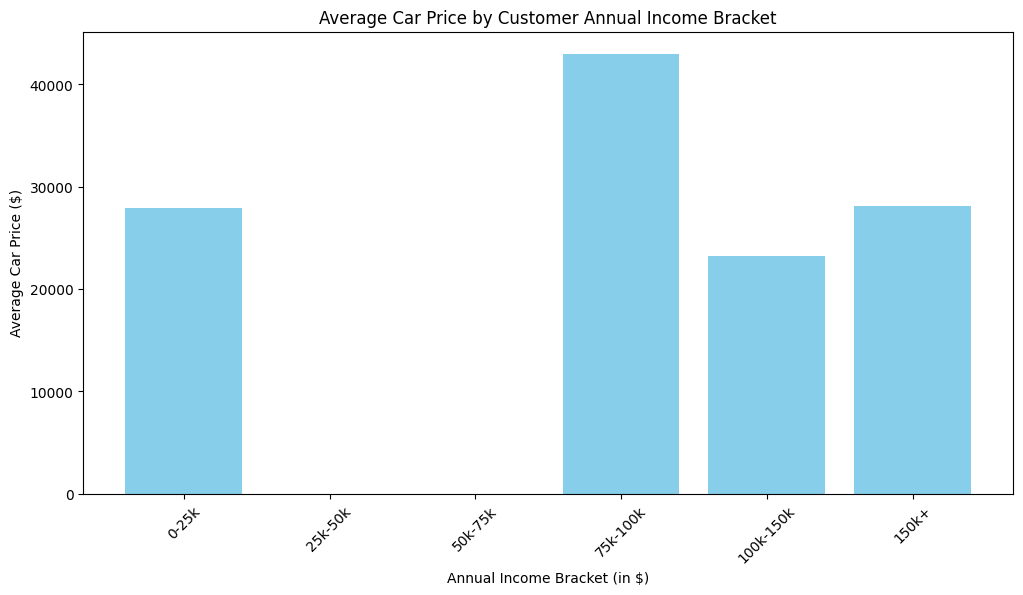

In [9]:
###9. How do car prices vary based on the customer’s annual income bracket

bins = [0, 25000, 50000, 75000, 100000, 150000, np.inf]
labels = ['0-25k', '25k-50k', '50k-75k', '75k-100k', '100k-150k', '150k+']
data['Income Bracket'] = pd.cut(data['Annual Income'], bins=bins, labels=labels)

average_price_by_income = data.groupby('Income Bracket')['Price ($)'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(average_price_by_income['Income Bracket'], average_price_by_income['Price ($)'], color='skyblue')
plt.xlabel('Annual Income Bracket (in $)')
plt.ylabel('Average Car Price ($)')
plt.title('Average Car Price by Customer Annual Income Bracket')
plt.xticks(rotation=45)
plt.show()


<Figure size 1200x600 with 0 Axes>

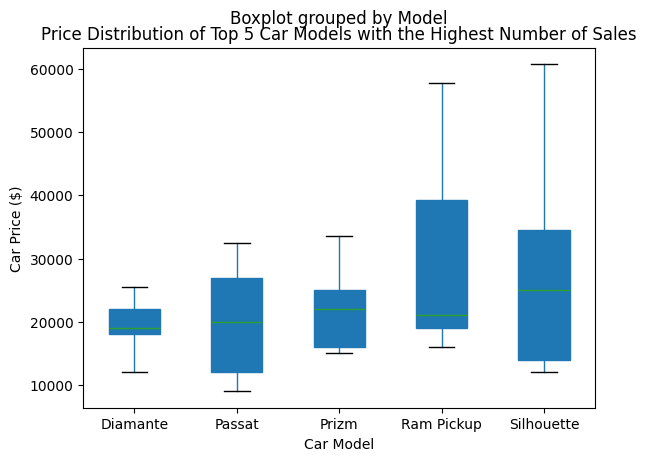

Top 5 car models with the highest number of sales:
        Model  Number of Sales
0    Diamante              418
1  Silhouette              411
2       Prizm              411
3      Passat              391
4  Ram Pickup              383


In [10]:
###10. What are the top 5 car models with the highest number of sales, and how does their price distribution look

model_sales_counts = data['Model'].value_counts().reset_index()
model_sales_counts.columns = ['Model', 'Number of Sales']

top_5_models = model_sales_counts.head(5)['Model']

top_5_models_data = data[data['Model'].isin(top_5_models)]

plt.figure(figsize=(12, 6))
top_5_models_data.boxplot(column='Price ($)', by='Model', grid=False, patch_artist=True, showfliers=False)
plt.title('Price Distribution of Top 5 Car Models with the Highest Number of Sales')
plt.xlabel('Car Model')
plt.ylabel('Car Price ($)')
plt.show()

print("Top 5 car models with the highest number of sales:")
print(model_sales_counts.head(5))


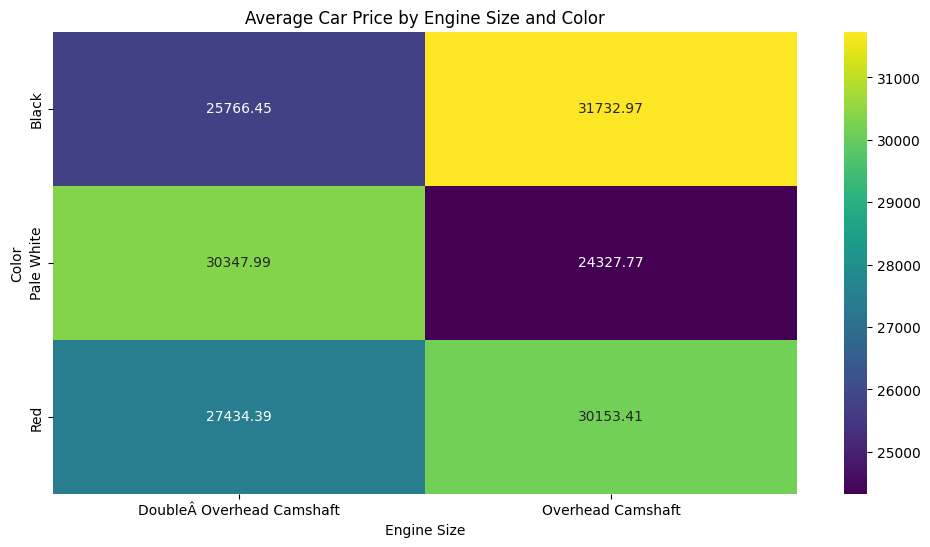

<ipython-input-11-9e548fcbdb5c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Color', y='Price Variation', data=price_variation_by_color, palette='viridis')


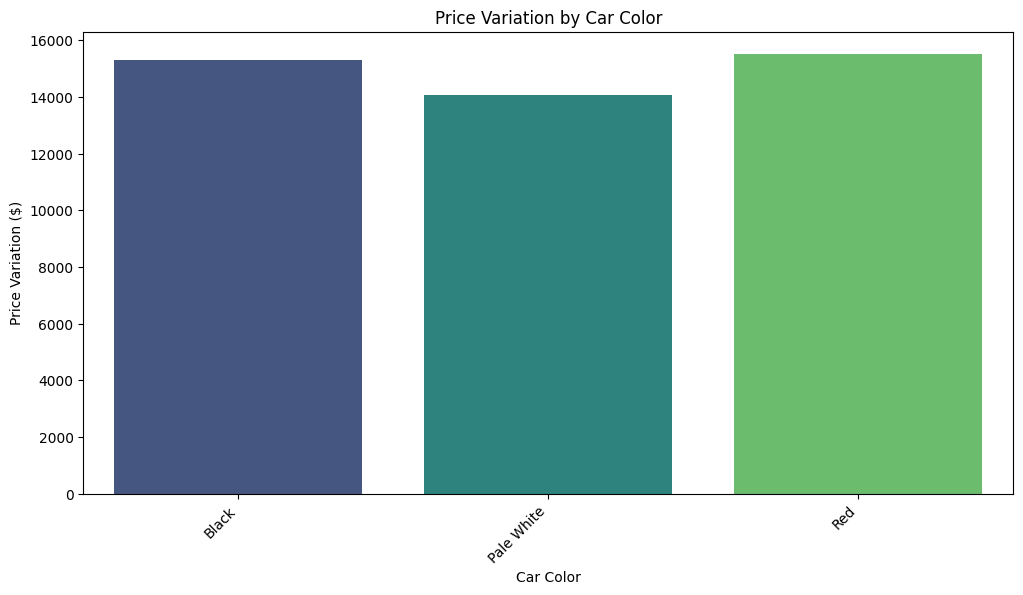

Car colors with the highest price variation:
        Color  Price Variation
2         Red     15519.360962
0       Black     15286.065976
1  Pale White     14077.346859


In [11]:
###11. How does car price vary with engine size across different car colors, and which colors have the highest price
#variation

average_price_by_engine_color = data.groupby(['Color', 'Engine'])['Price ($)'].mean().unstack().reset_index()

price_variation_by_color = data.groupby('Color')['Price ($)'].std().reset_index()
price_variation_by_color.columns = ['Color', 'Price Variation']

plt.figure(figsize=(12, 6))
sns.heatmap(average_price_by_engine_color.set_index('Color'), annot=True, fmt='.2f', cmap='viridis')
plt.title('Average Car Price by Engine Size and Color')
plt.xlabel('Engine Size')
plt.ylabel('Color')
plt.show()
plt.figure(figsize=(12, 6))
sns.barplot(x='Color', y='Price Variation', data=price_variation_by_color, palette='viridis')
plt.xlabel('Car Color')
plt.ylabel('Price Variation ($)')
plt.title('Price Variation by Car Color')
plt.xticks(rotation=45, ha='right')
plt.show()

print("Car colors with the highest price variation:")
print(price_variation_by_color.sort_values(by='Price Variation', ascending=False).head(5))


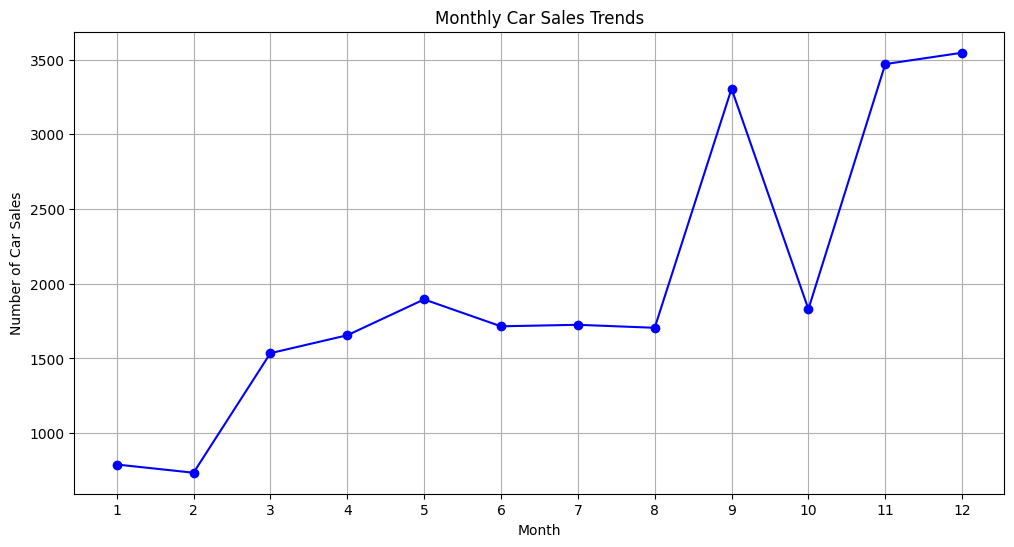

In [12]:
###12. Is there any seasonal trend in car sales based on the date of sale

data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

monthly_sales = data.groupby('Month').size().reset_index(name='Number of Sales')

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Month'], monthly_sales['Number of Sales'], marker='o', linestyle='-', color='b')
plt.xlabel('Month')
plt.ylabel('Number of Car Sales')
plt.title('Monthly Car Sales Trends')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()


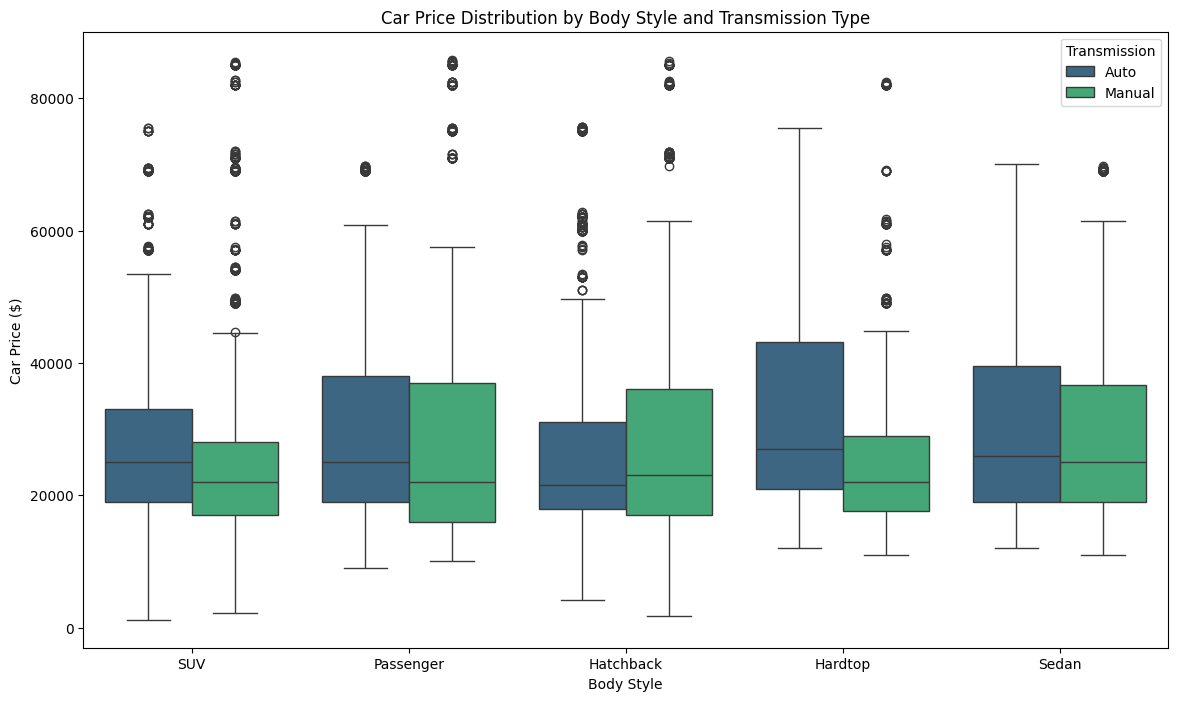

In [13]:
###13. How does the car price distribution change when considering different combinations of body style and
#transmission type

plt.figure(figsize=(14, 8))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=data, palette='viridis')

plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xlabel('Body Style')
plt.ylabel('Car Price ($)')
plt.show()


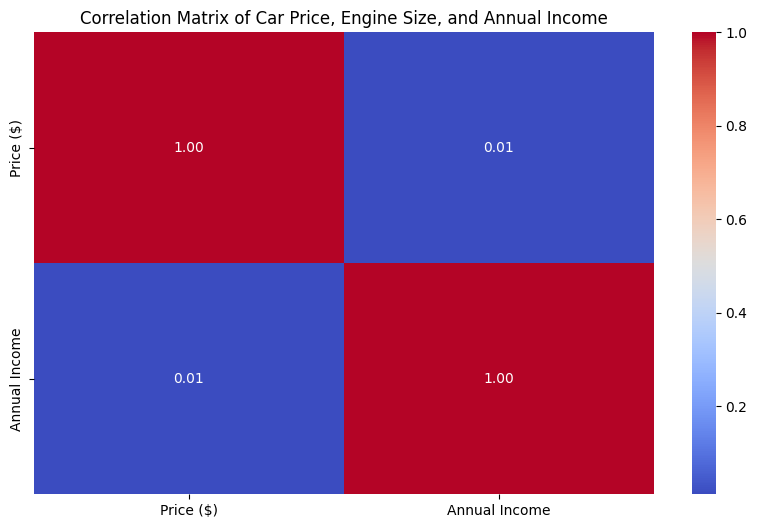

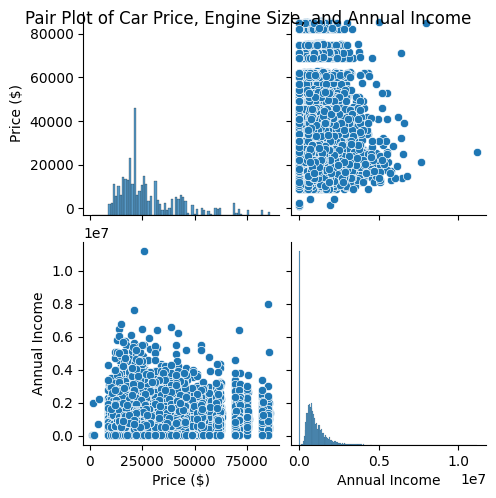

In [15]:
###14. What is the correlation between car price, engine size, and annual income of customers, and how do these
#features interact

data['Engine Size'] = data['Engine'].replace({'I4': 4, 'V6': 6, 'V8': 8})


correlation_data = data[['Price ($)', 'Engine Size', 'Annual Income']]


correlation_matrix = correlation_data.corr(numeric_only=True)


plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Car Price, Engine Size, and Annual Income')
plt.show()


sns.pairplot(correlation_data)
plt.suptitle('Pair Plot of Car Price, Engine Size, and Annual Income')
plt.show()


<Figure size 1400x800 with 0 Axes>

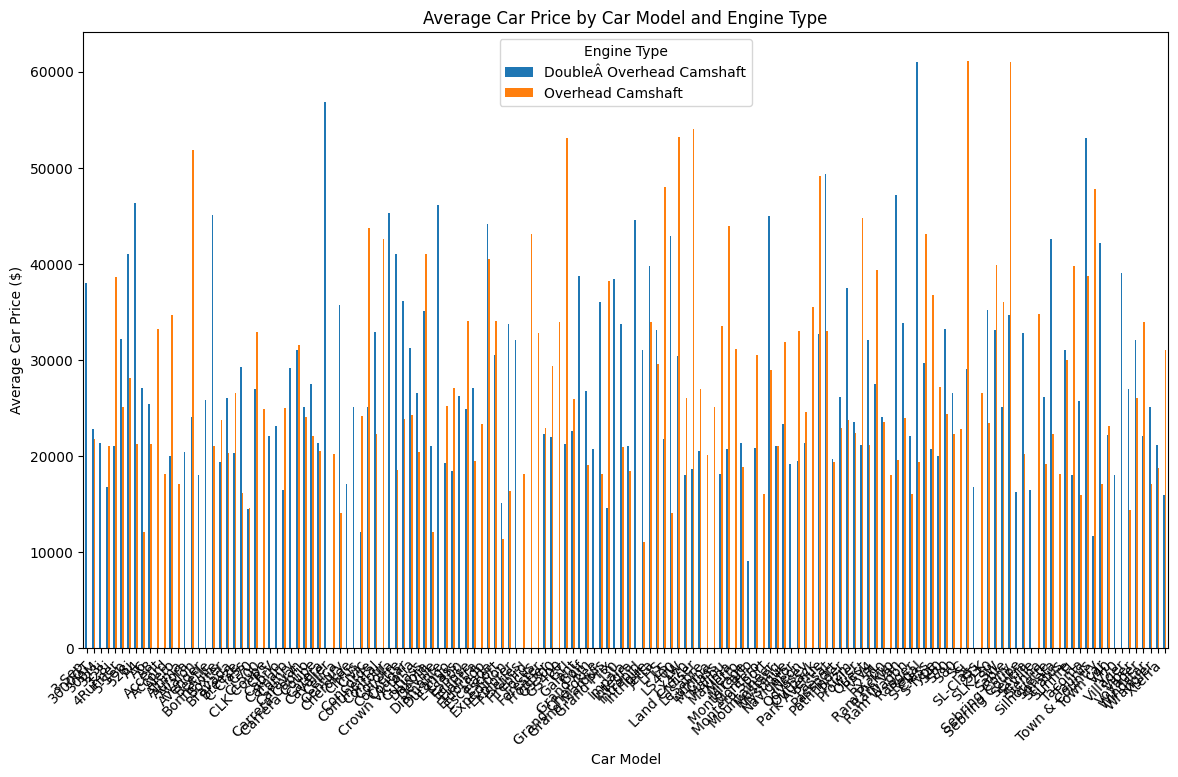

In [16]:
###15. How does the average car price vary across different car models and engine types

average_price_by_model_engine = data.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()

pivot_table = average_price_by_model_engine.pivot(index='Model', columns='Engine', values='Price ($)')

plt.figure(figsize=(14, 8))
pivot_table.plot(kind='bar', figsize=(14, 8))
plt.xlabel('Car Model')
plt.ylabel('Average Car Price ($)')
plt.title('Average Car Price by Car Model and Engine Type')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Engine Type')
plt.show()


#Amazon Sales Data

In [20]:
###1.What is the average rating for each product category


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/sample_data/amazon.csv')
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')
average_rating_per_category = data.groupby('category')['rating'].mean().reset_index()
print("Average Rating for Each Product Category:")
print(average_rating_per_category)


Average Rating for Each Product Category:
                                              category    rating
0    Car&Motorbike|CarAccessories|InteriorAccessori...  3.800000
1    Computers&Accessories|Accessories&Peripherals|...  4.150000
2    Computers&Accessories|Accessories&Peripherals|...  3.500000
3    Computers&Accessories|Accessories&Peripherals|...  3.600000
4    Computers&Accessories|Accessories&Peripherals|...  4.050000
..                                                 ...       ...
206  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.250000
207  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.150000
208  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.300000
209  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.133333
210  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...  4.300000

[211 rows x 2 columns]


In [19]:
###2.  What are the top rating_count products by category

top_products_by_category = data.loc[data.groupby('category')['rating_count'].idxmax()]
print("Top Products by Rating Count for Each Category:")
print(top_products_by_category[['category', 'product_name', 'rating_count']])


Top Products by Rating Count for Each Category:
                                               category  \
1157  Car&Motorbike|CarAccessories|InteriorAccessori...   
695   Computers&Accessories|Accessories&Peripherals|...   
906   Computers&Accessories|Accessories&Peripherals|...   
772   Computers&Accessories|Accessories&Peripherals|...   
844   Computers&Accessories|Accessories&Peripherals|...   
...                                                 ...   
616   OfficeProducts|OfficePaperProducts|Paper|Stati...   
993   OfficeProducts|OfficePaperProducts|Paper|Stati...   
765   OfficeProducts|OfficePaperProducts|Paper|Stati...   
850   OfficeProducts|OfficePaperProducts|Paper|Stati...   
924   Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...   

                                           product_name rating_count  
1157  Reffair AX30 [MAX] Portable Air Purifier for C...        1,118  
695   rts [2 Pack] Mini USB C Type C Adapter Plug, T...        4,426  
906   Hp Wired On Ear Headphon

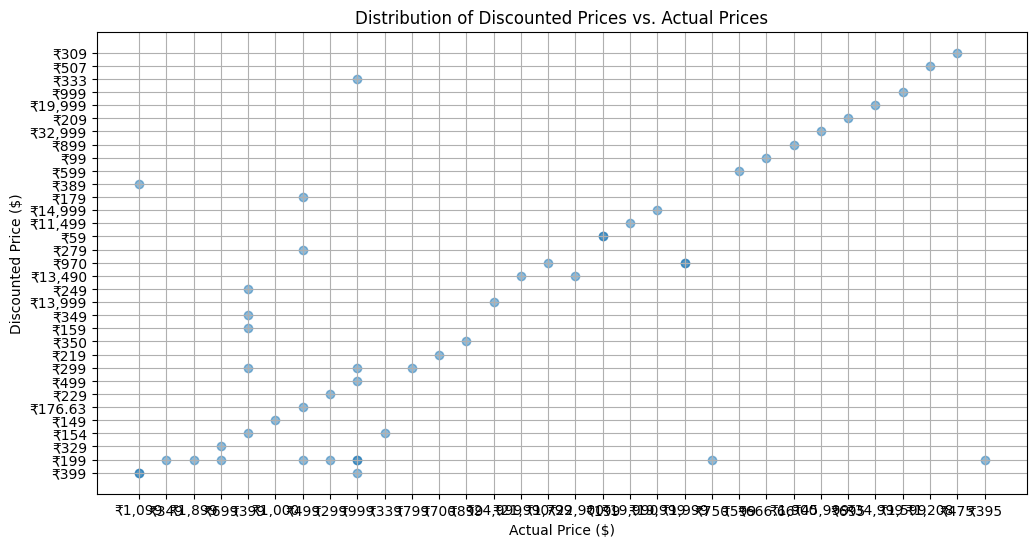

In [26]:
###3.  What is the distribution of discounted prices vs. actual prices
plt.figure(figsize=(12, 6))
plt.scatter(data['actual_price'][:50], data['discounted_price'][:50], alpha=0.5)
plt.xlabel('Actual Price ($)')
plt.ylabel('Discounted Price ($)')
plt.title('Distribution of Discounted Prices vs. Actual Prices')
plt.grid(True)
plt.show()


In [28]:
###4. How does the average discount percentage vary across categories
data['discount_percentage'] = data['discount_percentage'].str.rstrip('%').astype('float') / 100
average_discount_per_category = data.groupby('category')['discount_percentage'].mean().reset_index()

print("Average Discount Percentage for Each Category:")
print(average_discount_per_category)


Average Discount Percentage for Each Category:
                                              category  discount_percentage
0    Car&Motorbike|CarAccessories|InteriorAccessori...                0.420
1    Computers&Accessories|Accessories&Peripherals|...                0.785
2    Computers&Accessories|Accessories&Peripherals|...                0.350
3    Computers&Accessories|Accessories&Peripherals|...                0.565
4    Computers&Accessories|Accessories&Peripherals|...                0.465
..                                                 ...                  ...
206  OfficeProducts|OfficePaperProducts|Paper|Stati...                0.000
207  OfficeProducts|OfficePaperProducts|Paper|Stati...                0.050
208  OfficeProducts|OfficePaperProducts|Paper|Stati...                0.175
209  OfficeProducts|OfficePaperProducts|Paper|Stati...                0.130
210  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...                0.000

[211 rows x 2 columns]


In [30]:
###5. What are the most popular product names

data['rating_count'] = pd.to_numeric(data['rating_count'], errors='coerce')
popular_products = data.groupby('product_name')['rating_count'].sum().reset_index()

popular_products = popular_products.sort_values(by='rating_count', ascending=False).reset_index(drop=True)

print("Top 10 Most Popular Product Names:")
print(popular_products.head(10))


Top 10 Most Popular Product Names:
                                        product_name  rating_count
0  Duracell USB Lightning Apple Certified (Mfi) B...        2445.0
1  Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...        1948.0
2  Ambrane 2 in 1 Type-C & Micro USB Cable with 6...        1806.0
3  Wecool Unbreakable 3 in 1 Charging Cable with ...        1312.0
4  Sounce 65W OnePlus Dash Warp Charge Cable, 6.5...        1151.0
5  SWAPKART Fast Charging Cable and Data Sync USB...        1072.0
6  Eureka Forbes car Vac 100 Watts Powerful Sucti...         992.0
7       Eveready Red 1012 AAA Batteries - Pack of 10         989.0
8  Pigeon 1.5 litre Hot Kettle and Stainless Stee...         976.0
9  Zoul USB Type C Fast Charging 3A Nylon Braided...         974.0


In [31]:
###6. What are the most popular product keywords

from collections import Counter
import re

def tokenize(text):
    # Remove non-alphanumeric characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text).lower()
    # Split the text into words
    words = text.split()
    return words

all_words = []
for product_name in data['product_name']:
    all_words.extend(tokenize(product_name))

word_counts = Counter(all_words)

word_counts_df = pd.DataFrame(word_counts.items(), columns=['Keyword', 'Count']).sort_values(by='Count', ascending=False)

print("Top 10 Most Popular Product Keywords:")
print(word_counts_df.head(10))


Top 10 Most Popular Product Keywords:
     Keyword  Count
66      with    752
13       for    674
51     black    468
11     cable    401
3        usb    390
8        and    330
7   charging    246
4         to    218
6       fast    211
38         c    188


In [32]:
###7. What are the most popular product reviews

data_sorted = data.sort_values(by='rating_count', ascending=False)

top_reviews = data_sorted[['product_name', 'user_name', 'review_title', 'review_content', 'rating_count']].head(10)


print("Top 10 Most Popular Product Reviews:")
print(top_reviews)


Top 10 Most Popular Product Reviews:
                                           product_name  \
1279  Eureka Forbes car Vac 100 Watts Powerful Sucti...   
750        Eveready Red 1012 AAA Batteries - Pack of 10   
1059  Pigeon 1.5 litre Hot Kettle and Stainless Stee...   
151   Zoul USB Type C Fast Charging 3A Nylon Braided...   
32    Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...   
823   Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...   
1272  Bajaj New Shakti Neo Plus 15 Litre 4 Star Rate...   
1259  Hindware Atlantic Xceed 5L 3kW Instant Water H...   
214   Crypo™ Universal Remote Compatible with Tata S...   
1262  iBELL Castor CTEK15L Premium 1.5 Litre Stainle...   

                                              user_name  \
1279  Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...   
750   Amazon Customer,Cijo George,Mallikarjuna Ukkad...   
1059  Amresh Tiwari,Amazon Customer,Sarvagya Verma,S...   
151   Pratyush Pahuja,Thiyagarajan,yeses,Amazon Cust...   
32    Pratyush Pah

In [74]:
###8. What is the correlation between discounted_price and rating
data = pd.read_csv('/content/sample_data/amazon.csv')
mode = data['rating'].mode()
data['rating'] = data['rating'].fillna(mode)
data['rating'] = data['rating'].replace({'|': mode[0]})
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')
data['rating'].unique()

mode = data['discounted_price'].mode()
data['discounted_price'] = data['discounted_price'].fillna(mode)
data['discounted_price'] = data['discounted_price'].replace({'|': mode[0]})
data['discounted_price']= data['discounted_price'].str.replace('₹', '')
data['discounted_price']= data['discounted_price'].str.replace(',', '').astype(float)
data['discounted_price'] = pd.to_numeric(data['discounted_price'], errors='coerce')
data['discounted_price'].unique()

cleaned_data = data.dropna(subset=['discounted_price', 'rating'])
correlation = cleaned_data[['discounted_price', 'rating']].corr()

print("Correlation between Discounted Price and Rating:")
print(correlation)



Correlation between Discounted Price and Rating:
                  discounted_price    rating
discounted_price          1.000000  0.120335
rating                    0.120335  1.000000


In [36]:
###9.  What are the Top 5 categories based on the highest ratings

data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

average_rating_per_category = data.groupby('category')['rating'].mean().reset_index()
top_categories = average_rating_per_category.sort_values(by='rating', ascending=False).head(5)
print("Top 5 Categories Based on Highest Ratings:")
print(top_categories)


Top 5 Categories Based on Highest Ratings:
                                              category  rating
57                       Computers&Accessories|Tablets     4.6
48   Computers&Accessories|NetworkingDevices|Networ...     4.5
62    Electronics|Cameras&Photography|Accessories|Film     4.5
81   Electronics|HomeAudio|MediaStreamingDevices|St...     4.5
196  OfficeProducts|OfficeElectronics|Calculators|B...     4.5


In [69]:
###10.  Identify any potential areas for improvement or optimization based on the data analysis.
data = pd.read_csv('/content/sample_data/amazon.csv')
mode = data['rating'].mode()
print(mode)
data['rating'] = data['rating'].fillna(mode)
data['rating'] = data['rating'].replace({'|': mode[0]})
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')
data['rating'].unique()

average_rating_per_category = data.groupby('category')['rating'].mean().reset_index()

underperforming_categories = average_rating_per_category[average_rating_per_category['rating'] < 4]
print("Underperforming Categories:")
print(underperforming_categories)


0    4.1
Name: rating, dtype: object
Underperforming Categories:
                                              category    rating
0    Car&Motorbike|CarAccessories|InteriorAccessori...  3.800000
2    Computers&Accessories|Accessories&Peripherals|...  3.500000
3    Computers&Accessories|Accessories&Peripherals|...  3.600000
9    Computers&Accessories|Accessories&Peripherals|...  3.900000
13   Computers&Accessories|Accessories&Peripherals|...  3.981818
14   Computers&Accessories|Accessories&Peripherals|...  3.400000
24   Computers&Accessories|Accessories&Peripherals|...  3.980000
33   Computers&Accessories|Accessories&Peripherals|...  3.940000
34   Computers&Accessories|Accessories&Peripherals|...  3.940000
35   Computers&Accessories|Accessories&Peripherals|...  3.900000
46   Computers&Accessories|NetworkingDevices|DataCa...  3.800000
55   Computers&Accessories|Printers,Inks&Accessorie...  3.666667
56   Computers&Accessories|Printers,Inks&Accessorie...  3.600000
60   Electronics|Cameras&

#Spotify Data:Popular Hip-Hop Artists and Tracks

In [75]:
###1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
#the needful

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/sample_data/spotify.csv')

print("Null values in each column:")
print(data.isnull().sum())

data = data.dropna()

print("Number of duplicate rows:")
print(data.duplicated().sum())

data = data.drop_duplicates()

print("Cleaned dataset:")
print(data.head())


Null values in each column:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Number of duplicate rows:
27
Cleaned dataset:
  Artist                               Track Name  Popularity  Duration (ms)  \
0  Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92         319191   
1  Drake                                One Dance          91         173986   
2  Drake                       IDGAF (feat. Yeat)          90         260111   
3  Drake     First Person Shooter (feat. J. Cole)          88         247444   
4  Drake            Jimmy Cooks (feat. 21 Savage)          88         218364   

                 Track ID  
0  1yeB8MUNeLo9Ek1UEpsyz6  
1  1zi7xx7UVEFkmKfv06H8x0  
2  2YSzYUF3jWqb9YP9VXmpjE  
3  7aqfrAY2p9BUSiupwk3svU  
4  3F5CgOj3wFlRv51JsHbxhe  


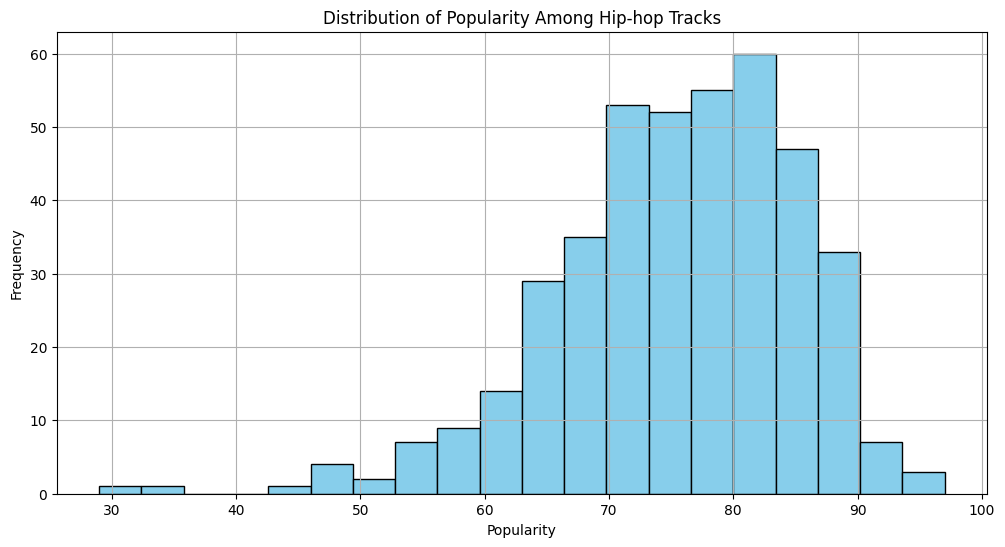

In [76]:
###2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram

data['Popularity'] = pd.to_numeric(data['Popularity'], errors='coerce')

plt.figure(figsize=(12, 6))
plt.hist(data['Popularity'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Distribution of Popularity Among Hip-hop Tracks')
plt.grid(True)
plt.show()


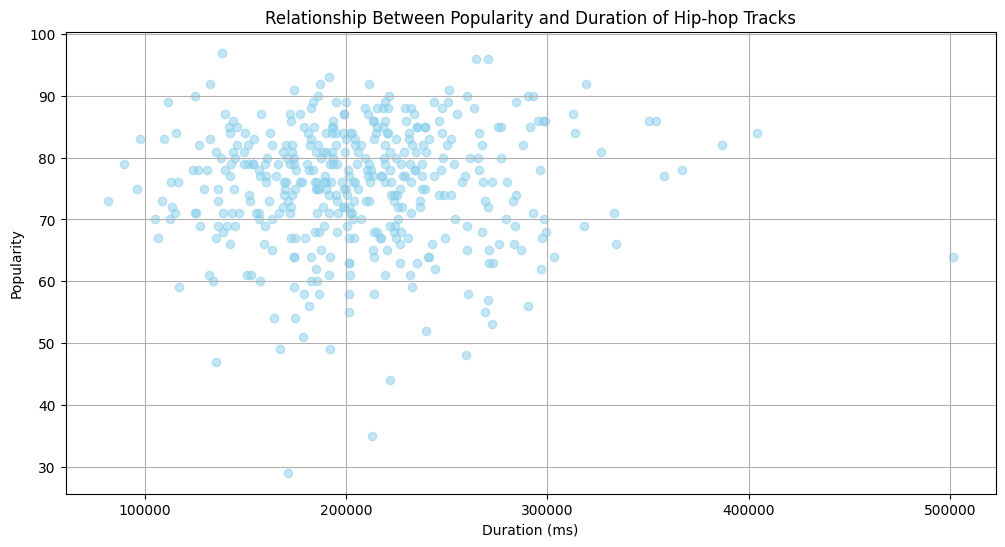

In [77]:
###3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot

data['Popularity'] = pd.to_numeric(data['Popularity'], errors='coerce')
data['Duration (ms)'] = pd.to_numeric(data['Duration (ms)'], errors='coerce')

plt.figure(figsize=(12, 6))
plt.scatter(data['Duration (ms)'], data['Popularity'], alpha=0.5, color='skyblue')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.title('Relationship Between Popularity and Duration of Hip-hop Tracks')
plt.grid(True)
plt.show()


<ipython-input-78-2b0935199f8b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Artist', data=data, order=data['Artist'].value_counts().index, palette='viridis')


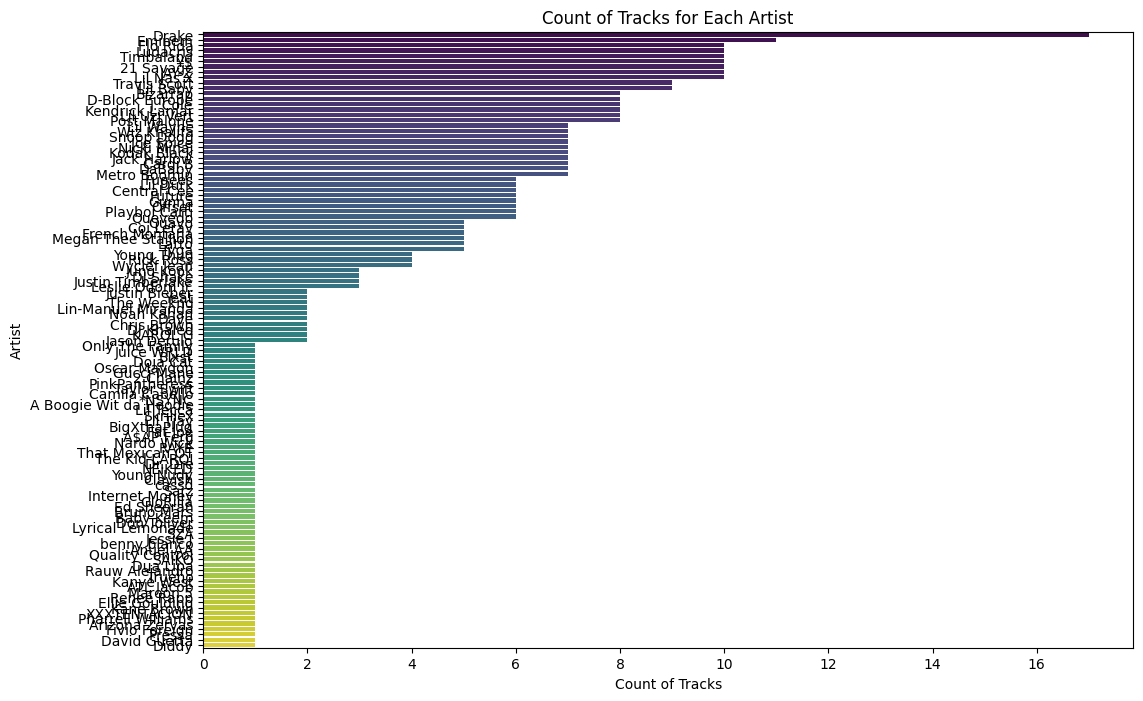

Artist with the highest number of tracks: Drake (17 tracks)


In [78]:
###4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
#a countplot

track_counts = data['Artist'].value_counts().reset_index()
track_counts.columns = ['Artist', 'Track Count']

plt.figure(figsize=(12, 8))
sns.countplot(y='Artist', data=data, order=data['Artist'].value_counts().index, palette='viridis')
plt.xlabel('Count of Tracks')
plt.ylabel('Artist')
plt.title('Count of Tracks for Each Artist')
plt.show()

top_artist = track_counts.iloc[0]
print(f"Artist with the highest number of tracks: {top_artist['Artist']} ({top_artist['Track Count']} tracks)")


In [79]:
###5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each

data['Popularity'] = pd.to_numeric(data['Popularity'], errors='coerce')

least_popular_tracks = data.sort_values(by='Popularity', ascending=True).head(5)

print("Top 5 Least Popular Tracks:")
print(least_popular_tracks[['Artist', 'Track Name', 'Popularity']])


Top 5 Least Popular Tracks:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [80]:
###6.Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
#display the average popularity for each artist

data['Popularity'] = pd.to_numeric(data['Popularity'], errors='coerce')

average_popularity_per_artist = data.groupby('Artist')['Popularity'].mean().reset_index()

top_artists = average_popularity_per_artist.sort_values(by='Popularity', ascending=False).head(5)

print("Top 5 Most Popular Artists Based on Average Popularity:")
print(top_artists)

most_popular_artist = top_artists.iloc[0]
print(f"\nArtist with the highest average popularity: {most_popular_artist['Artist']} (Average Popularity: {most_popular_artist['Popularity']})")


Top 5 Most Popular Artists Based on Average Popularity:
           Artist  Popularity
113         cassö   92.000000
104        Trueno   89.000000
24   David Guetta   87.000000
103  Travis Scott   86.555556
114            ¥$   85.100000

Artist with the highest average popularity: cassö (Average Popularity: 92.0)


In [81]:
###7.For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist

data['Popularity'] = pd.to_numeric(data['Popularity'], errors='coerce')

average_popularity_per_artist = data.groupby('Artist')['Popularity'].mean().reset_index()
top_artists = average_popularity_per_artist.sort_values(by='Popularity', ascending=False).head(5)

most_popular_tracks = []
for artist in top_artists['Artist']:
    artist_tracks = data[data['Artist'] == artist]
    most_popular_track = artist_tracks.sort_values(by='Popularity', ascending=False).iloc[0]
    most_popular_tracks.append({
        'Artist': artist,
        'Track Name': most_popular_track['Track Name'],
        'Popularity': most_popular_track['Popularity']
    })

most_popular_tracks_df = pd.DataFrame(most_popular_tracks)
print("Most Popular Tracks for Top 5 Most Popular Artists:")
print(most_popular_tracks_df)


Most Popular Tracks for Top 5 Most Popular Artists:
         Artist                    Track Name  Popularity
0         cassö                         Prada          92
1        Trueno  Mamichula - con Nicki Nicole          89
2  David Guetta            Baby Don't Hurt Me          87
3  Travis Scott    FE!N (feat. Playboi Carti)          93
4            ¥$                      CARNIVAL          96


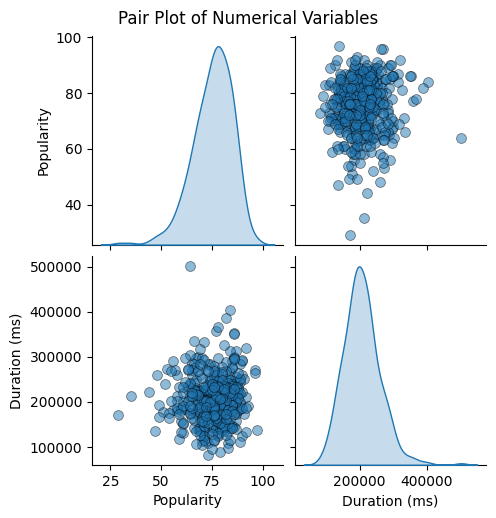

In [83]:
###8. Visualize relationships between multiple numerical variables simultaneously using a pair plot

data['Popularity'] = pd.to_numeric(data['Popularity'], errors='coerce')
data['Duration (ms)'] = pd.to_numeric(data['Duration (ms)'], errors='coerce')

numerical_vars = ['Popularity', 'Duration (ms)']
sns.pairplot(data[numerical_vars], diag_kind='kde', plot_kws={'alpha':0.5, 's':50, 'edgecolor':'k'})
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()


<ipython-input-84-14a2bdde377d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Artist', y='Duration (ms)', data=subset_data, palette='viridis')


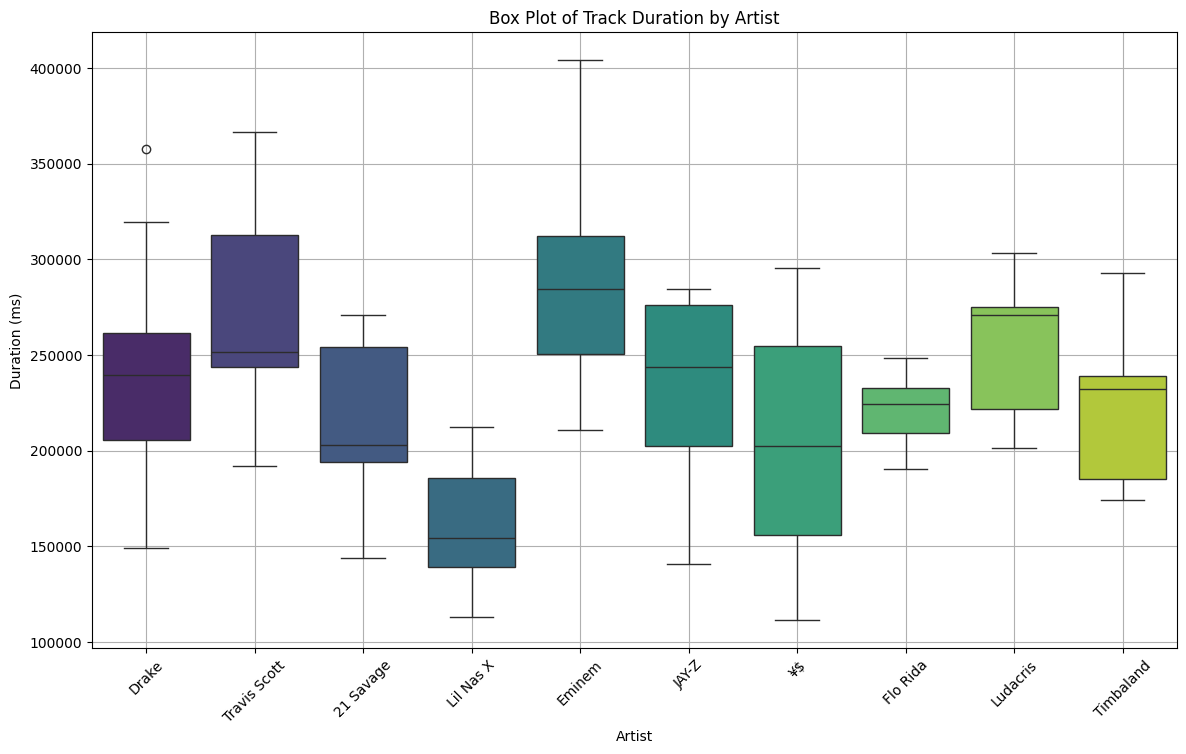

<ipython-input-84-14a2bdde377d>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Artist', y='Duration (ms)', data=subset_data, palette='viridis')


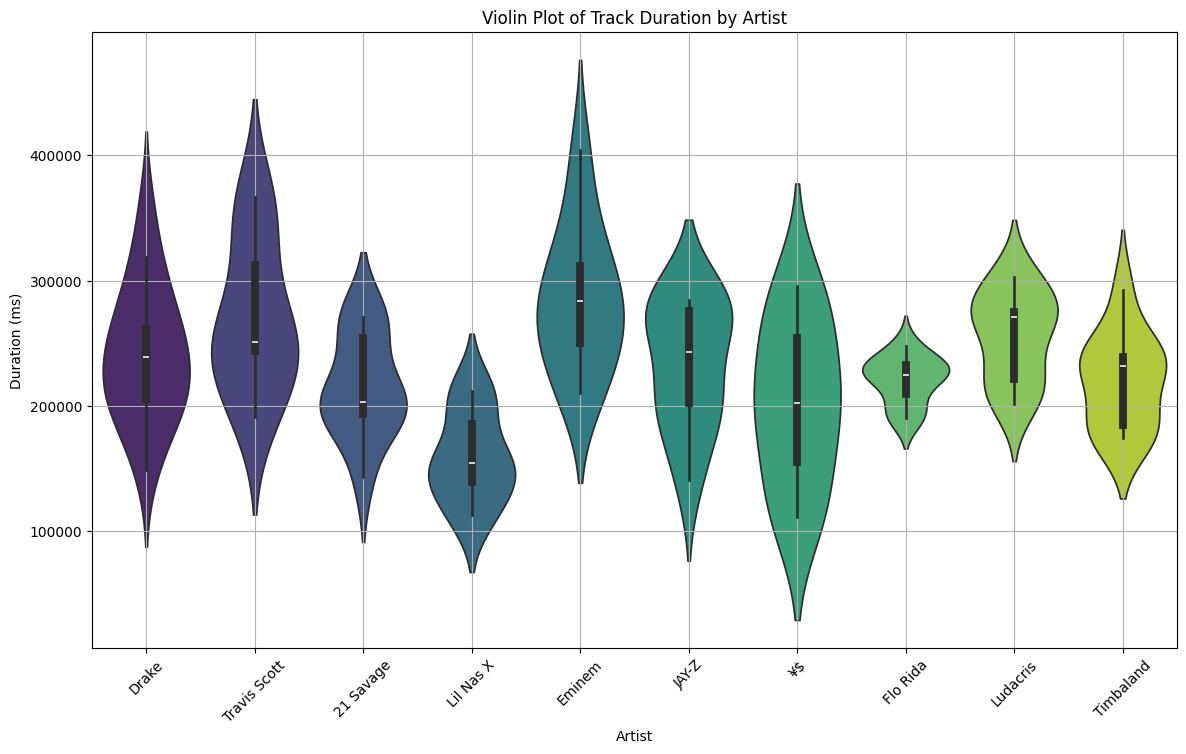

In [84]:
###9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or
#violin plot

data['Duration (ms)'] = pd.to_numeric(data['Duration (ms)'], errors='coerce')

selected_artists = data['Artist'].value_counts().head(10).index
subset_data = data[data['Artist'].isin(selected_artists)]
plt.figure(figsize=(14, 8))
sns.boxplot(x='Artist', y='Duration (ms)', data=subset_data, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.title('Box Plot of Track Duration by Artist')
plt.grid(True)
plt.show()
plt.figure(figsize=(14, 8))
sns.violinplot(x='Artist', y='Duration (ms)', data=subset_data, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.title('Violin Plot of Track Duration by Artist')
plt.grid(True)
plt.show()


<ipython-input-85-8551e83f23dc>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='Artist', y='Popularity', data=subset_data, palette='viridis')


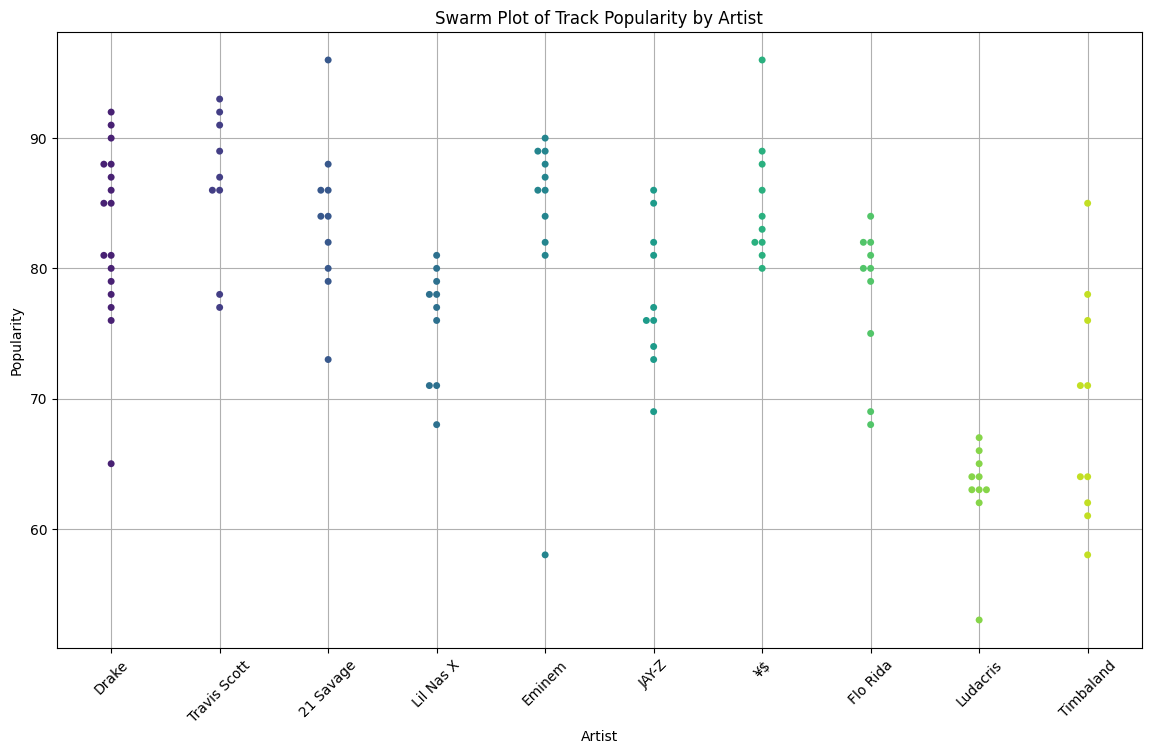

<ipython-input-85-8551e83f23dc>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Artist', y='Popularity', data=subset_data, palette='viridis')


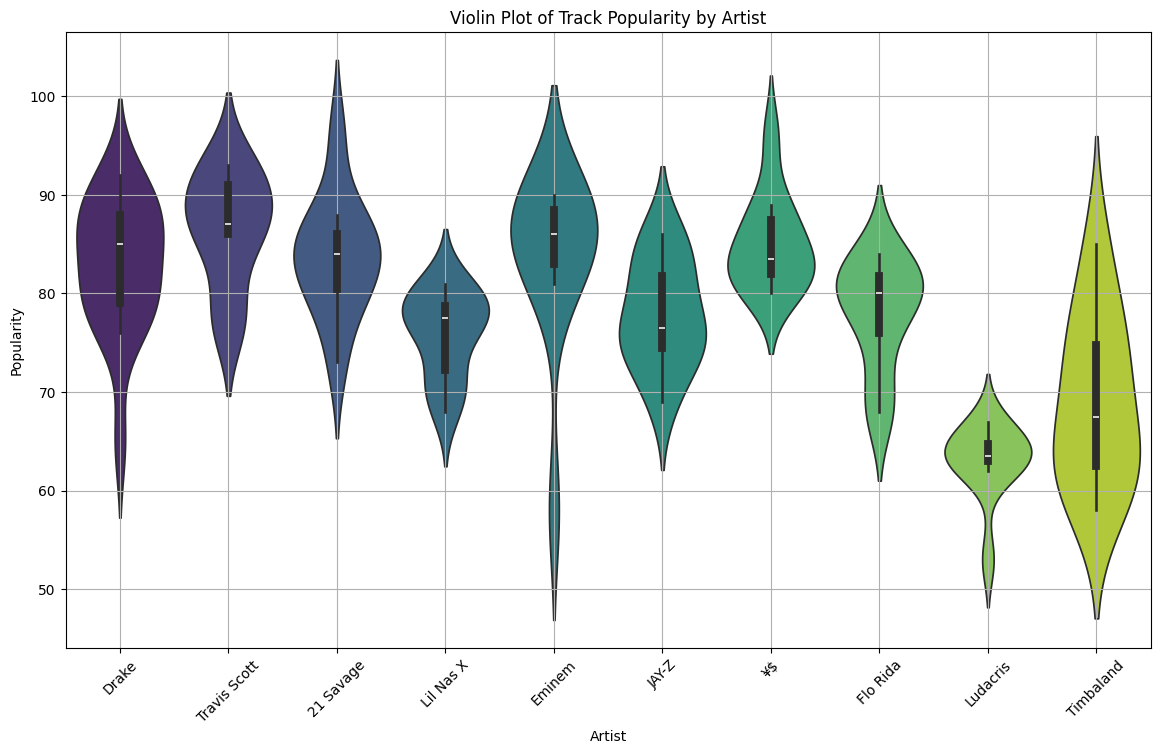

In [85]:
###10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a
#violin plot

data['Popularity'] = pd.to_numeric(data['Popularity'], errors='coerce')
selected_artists = data['Artist'].value_counts().head(10).index
subset_data = data[data['Artist'].isin(selected_artists)]
plt.figure(figsize=(14, 8))
sns.swarmplot(x='Artist', y='Popularity', data=subset_data, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.title('Swarm Plot of Track Popularity by Artist')
plt.grid(True)
plt.show()
plt.figure(figsize=(14, 8))
sns.violinplot(x='Artist', y='Popularity', data=subset_data, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.title('Violin Plot of Track Popularity by Artist')
plt.grid(True)
plt.show()
